In [113]:
# import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Target Columns Charges
# Regression Problem

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
# EDA
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.shape

(1338, 7)

In [7]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [8]:
df.duplicated().sum()

np.int64(1)

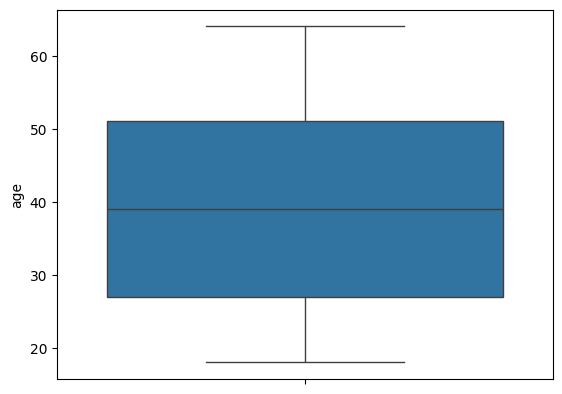

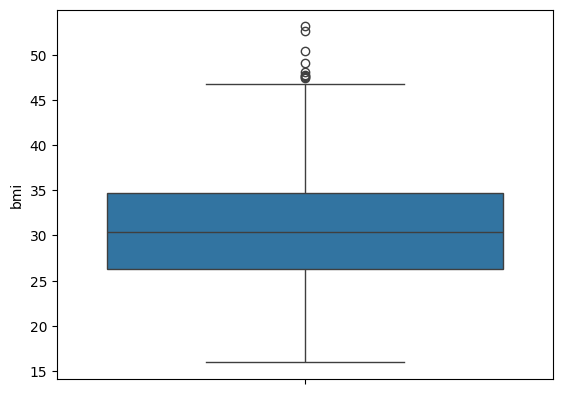

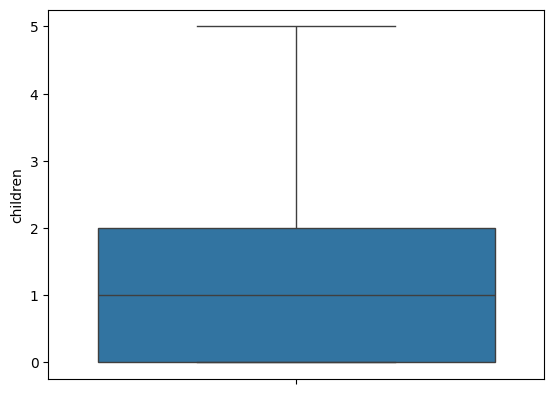

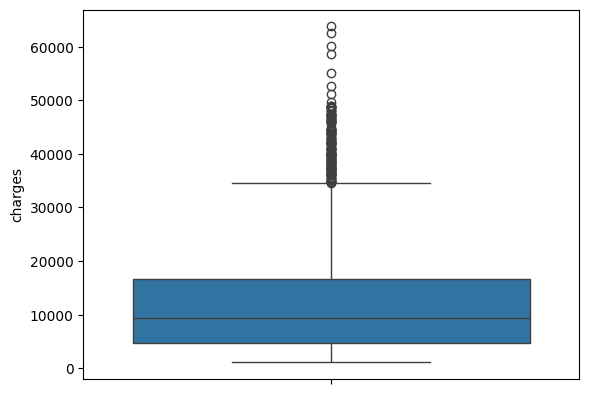

In [13]:
# cheking for the outliers
for i in df.select_dtypes(include = 'number'):
  sns.boxplot(df[i])
  plt.show()

# Problem in Data
### 1 - First problem is the Skewness of the Charge Columns <Br>

Text(0.5, 1.0, 'Checking the Distribution of the Target columns')

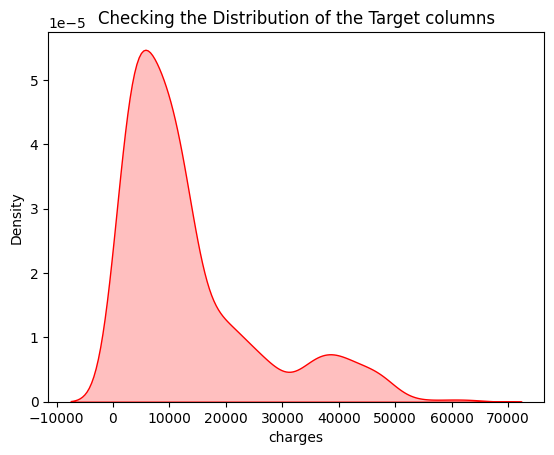

In [17]:
sns.kdeplot(df['charges'], color = 'red',fill=True)
plt.title("Checking the Distribution of the Target columns")

# handling the ouliers

In [28]:

# Calculate the outliers Percnetage
def oultier_calculate(col_name , df = df):
  Qunatile1 = df[col_name].quantile(0.25)
  Quantile3 = df[col_name].quantile(0.75)
  IQR = Quantile3 - Qunatile1
  lower_band = Qunatile1 - 1.5 * IQR
  Upper_band = Quantile3 + 1.5 * IQR
  total_outliers = df[df[col_name] < lower_band] + df[df[col_name] > Upper_band]
  return total_outliers.shape[0] / df.shape[0]


def Delete_outliers(col_name , df = df):
  Qunatile1 = df[col_name].quantile(0.25)
  Quantile3 = df[col_name].quantile(0.75)
  IQR = Quantile3 - Qunatile1
  lower_band = Qunatile1 - 1.5 * IQR
  Upper_band = Quantile3 + 1.5 * IQR
  df = df[(df[col_name] > lower_band) & (df[col_name] < Upper_band)]
  return df

In [29]:
oultier_calculate('bmi',df)

0.006726457399103139

In [30]:
Delete_outliers('bmi',df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: >

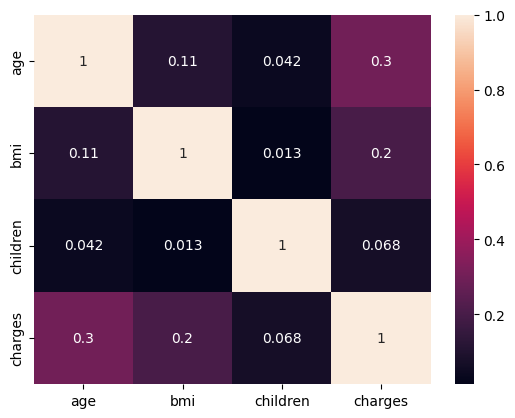

In [ ]:
# Check for Colleration
corr = df.select_dtypes(include = 'number').corr()
sns.heatmap(corr,annot=True)

In [77]:
# Spliting the data --> Encoding the Data
x = df.drop('charges',axis  = 1)
y = df.charges

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### binning for categorical data <Br>
### transform Target <Br>
### Normlaize Data <Br>

In [126]:
x_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,BMI_Categorices_Obese Class I,BMI_Categorices_Obese Class II,BMI_Categorices_Obese Class III,BMI_Categorices_Overweight,BMI_Categorices_Underweight,Age_Categorices_25-34,Age_Categorices_35-44,Age_Categorices_45-54,Age_Categorices_55-64,Age_Categorices_Under 18
560,46,19.95,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1285,47,24.32,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1142,52,24.86,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
969,39,34.32,5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
486,54,21.47,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [130]:
x_test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,BMI_Categorices_Obese Class I,BMI_Categorices_Obese Class II,BMI_Categorices_Obese Class III,BMI_Categorices_Overweight,BMI_Categorices_Underweight,Age_Categorices_25-34,Age_Categorices_35-44,Age_Categorices_45-54,Age_Categorices_55-64,Age_Categorices_Under 18
764,45,25.175,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
887,36,30.020,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
890,64,26.885,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1293,46,25.745,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
259,19,31.920,0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
age_bins = [0, 18, 24, 34, 44, 54, 64, float('inf')]
age_labels = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 and above']
df['Age_Categorices'] = pd.cut(df['age'] ,bins= age_bins , labels=age_labels )

In [120]:
x_train['Age_Categorices'] = df['Age_Categorices']

In [128]:
x_test['Age_Categorices'] = df['Age_Categorices']

In [123]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop ='first')
ohe.fit(x_train[['Age_Categorices']])

OneHotEncoder(drop='first')

In [124]:
ohe.get_feature_names_out()

array(['Age_Categorices_25-34', 'Age_Categorices_35-44',
       'Age_Categorices_45-54', 'Age_Categorices_55-64',
       'Age_Categorices_Under 18'], dtype=object)

In [125]:
temp_values = ohe.transform(x_train[['Age_Categorices']]).toarray()
x_train = x_train.drop(['Age_Categorices'] , axis = 1)
x_train[['Age_Categorices_25-34', 'Age_Categorices_35-44',
       'Age_Categorices_45-54', 'Age_Categorices_55-64',
       'Age_Categorices_Under 18']] = temp_values

In [129]:
temp_values = ohe.transform(x_test[['Age_Categorices']]).toarray()
x_test = x_test.drop(['Age_Categorices'] , axis = 1)
x_test[['Age_Categorices_25-34', 'Age_Categorices_35-44',
       'Age_Categorices_45-54', 'Age_Categorices_55-64',
       'Age_Categorices_Under 18']] = temp_values

In [64]:
#  Try to make binning for the Bmi Feature
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9 , float('inf')]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III']
df['BMI_Categorices'] = pd.cut(df['bmi'] ,bins= bmi_bins , labels=bmi_labels )


In [66]:
x_train['Bmi_categorical'] = df['BMI_Categorices']

In [79]:

ohe.fit(x_train[['sex','smoker','region']])

OneHotEncoder(drop='first')

In [83]:
ohe.get_feature_names_out()

array(['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest'], dtype=object)

In [84]:
temp_value = ohe.transform(x_train[['sex','smoker','region']]).toarray()
x_train = x_train.drop(['sex','smoker','region'] , axis = 1)
x_train[['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest']] = temp_value

In [86]:
temp_value = ohe.transform(x_test[['sex','smoker','region']]).toarray()
x_test = x_test.drop(['sex','smoker','region'] , axis = 1)
x_test[['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest']] = temp_value

In [33]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = 'first')
ohe.fit(x_train[['sex','smoker','region']])

OneHotEncoder(drop='first')

In [93]:
ohe.fit(x_train[['BMI_Categorices']])


OneHotEncoder(drop='first')

In [94]:
ohe.get_feature_names_out()

array(['BMI_Categorices_Obese Class I', 'BMI_Categorices_Obese Class II',
       'BMI_Categorices_Obese Class III', 'BMI_Categorices_Overweight',
       'BMI_Categorices_Underweight'], dtype=object)

In [95]:
# For x_train
temp_valuesForBMI = ohe.transform(x_train[['BMI_Categorices']]).toarray()
x_train = x_train.drop(['BMI_Categorices'] , axis = 1)
x_train[['BMI_Categorices_Obese Class I', 'BMI_Categorices_Obese Class II',
       'BMI_Categorices_Obese Class III', 'BMI_Categorices_Overweight',
       'BMI_Categorices_Underweight']] = temp_valuesForBMI

In [100]:
temp_valuesForBMI = ohe.transform(x_test[['BMI_Categorices']]).toarray()
x_test = x_test.drop(['BMI_Categorices'] , axis = 1)
x_test[['BMI_Categorices_Obese Class I', 'BMI_Categorices_Obese Class II',
       'BMI_Categorices_Obese Class III', 'BMI_Categorices_Overweight',
       'BMI_Categorices_Underweight']] = temp_valuesForBMI

In [ ]:
# For x_train
temp_var = ohe.transform(x_train[['sex','smoker','region']]).toarray()
x_train = x_train.drop(['sex','smoker','region'],axis = 1)
x_train[['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest']] = temp_var

In [97]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [98]:
predict = lr.predict(x_train)
mean_squared_error(y_train,predict)

36304842.653964095

In [101]:
predict = lr.predict(x_test)
mean_squared_error(y_test,predict)

34161566.64031531

# The Model Is SO Bad
## lets try to take optimize the Skewness
### 1 - Binning fot Categorical Data
### 2 - Transform the Target
### 3 - Normalize the Data


# Log Transform

In [131]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [132]:
lr_log = LinearRegression()
lr_log.fit(x_train,y_train_log)

LinearRegression()

In [138]:
predict = lr_log.predict(x_train)
print(f"The mean squared Error : {mean_squared_error(y_train_log,predict)}")
print(f"The mean absolute Error : {mean_absolute_error(y_train_log,predict)}")

The mean squared Error : 0.1982391783121067
The mean absolute Error : 0.2868082858340457


In [139]:
predict = lr_log.predict(x_test)
print(f"The mean squared Error : {mean_squared_error(y_test_log,predict)}")
print(f"The mean absolute Error : {mean_absolute_error(y_test_log,predict)}")

The mean squared Error : 0.1751100872091766
The mean absolute Error : 0.27899660861347436


In [ ]:
# Test > Train - > overfit
#  text < train -> underfit

In [148]:
import pickle

In [149]:
with open("linearRegression.pkl",'wb')as f:
  pickle.dump(lr_log,f)

In [150]:
with open("OneHotEncoding.pkl",'wb')as f:
  pickle.dump(ohe,f)

In [140]:
x_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,BMI_Categorices_Obese Class I,BMI_Categorices_Obese Class II,BMI_Categorices_Obese Class III,BMI_Categorices_Overweight,BMI_Categorices_Underweight,Age_Categorices_25-34,Age_Categorices_35-44,Age_Categorices_45-54,Age_Categorices_55-64,Age_Categorices_Under 18
560,46,19.95,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1285,47,24.32,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1142,52,24.86,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
969,39,34.32,5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
486,54,21.47,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [141]:
lr_log.predict([[46	,19.95	,2	,0.0	,0.0	,1.0	,0.0	,0.0	,0.0	,0.0	,0.0	,0.0	,0.0	,0.0	,0.0,1.0,0.0,0.0]])

array([9.03097061])

In [145]:
lr_log.predict([[54	,21.47	,0	,0.0	,0.0	,0.0	,0.0	,0.0	,0.0	,0.0	,0.0	,0.0	,0.0	,0.0	,0.0 , 1.0 , 0.0 , 0.0]])

array([9.21022729])

In [146]:
np.exp(9.21022729)

np.float64(9998.869244173435)

In [151]:
!pip freeze > requirement.txt
